In [2]:
! pip install pyarrow

  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/99/14/7c44b42e0c04d133da556539464e2fc9b78b69bdc5b21fa4870f15029649/pyarrow-14.0.1-cp38-cp38-macosx_10_14_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.8/26.8 MB 7.6 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Import Packages and Data

In [2]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zone_data = pd.read_csv('/Users/apple/Desktop/dataset/taxi_zone_lookup.csv')
zone_data

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [19]:
# convert parquet format to DataFrame
trips_1 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-01.parquet')
trips_1 = trips_1.to_pandas()
# select certain columns
trips_1 = trips_1[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
# select Uber only
uber_1 = trips_1[trips_1['hvfhs_license_num']=='HV0003']
# reset index
uber_1 = uber_1.reset_index(drop=True)
uber_1

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:28:09,2021-01-01 00:31:42,923,5.26,22.28,1.98,0.00,230,166
1,HV0003,2021-01-01 00:45:56,2021-01-01 00:55:19,1382,3.65,18.36,1.63,0.00,152,167
2,HV0003,2021-01-01 00:21:15,2021-01-01 00:22:41,849,3.51,14.05,1.25,0.94,233,142
3,HV0003,2021-01-01 00:39:12,2021-01-01 00:42:37,179,0.74,7.91,0.70,0.00,142,143
4,HV0003,2021-01-01 00:46:11,2021-01-01 00:47:17,1228,9.20,27.11,2.41,0.00,143,78
...,...,...,...,...,...,...,...,...,...,...
8704123,HV0003,2021-01-31 23:13:51,2021-01-31 23:25:03,870,2.29,16.78,1.49,0.00,89,71
8704124,HV0003,2021-01-31 23:23:56,2021-01-31 23:29:03,1093,4.10,17.19,1.53,2.00,182,167
8704125,HV0003,2021-01-31 23:42:53,2021-01-31 23:49:23,904,2.40,19.53,1.73,0.00,167,169
8704126,HV0003,2021-01-31 23:04:32,2021-01-31 23:09:13,1097,3.60,19.87,1.76,0.00,188,37


In [20]:
trips_2 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-02.parquet')
trips_2 = trips_2.to_pandas()
trips_2 = trips_2[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_2 = trips_2[trips_2['hvfhs_license_num']=='HV0003']
uber_2 = uber_2.reset_index(drop=True)
uber_2

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-31 23:59:00,2021-02-01 00:10:19,629,2.06,17.14,1.52,0.0,35,39
1,HV0003,2021-02-01 00:13:35,2021-02-01 00:25:23,998,3.15,32.11,2.85,0.0,39,35
2,HV0003,2021-01-31 23:57:50,2021-02-01 00:08:25,555,2.62,15.56,1.38,0.0,126,250
3,HV0003,2021-02-01 00:11:48,2021-02-01 00:24:25,1009,6.89,19.98,1.77,0.0,208,243
4,HV0003,2021-02-01 00:39:45,2021-02-01 00:44:57,1020,4.26,42.36,3.76,0.0,243,220
...,...,...,...,...,...,...,...,...,...,...
8290753,HV0003,2021-02-28 23:49:17,2021-02-28 23:52:56,2002,22.62,44.06,3.91,0.0,21,92
8290754,HV0003,2021-02-28 22:54:16,2021-02-28 23:14:08,1407,8.61,26.21,2.33,0.0,148,228
8290755,HV0003,2021-02-28 23:33:40,2021-02-28 23:41:28,1382,5.14,21.35,1.89,0.0,228,89
8290756,HV0003,2021-02-28 23:05:01,2021-02-28 23:07:15,251,1.10,9.49,0.84,0.0,10,205


In [21]:
trips_3 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-03.parquet')
trips_3 = trips_3.to_pandas()
trips_3 = trips_3[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_3 = trips_3[trips_3['hvfhs_license_num']=='HV0003']
uber_3 = uber_3.reset_index(drop=True)
uber_3

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-02-28 23:58:06,2021-03-01 00:06:44,409,1.35,7.91,0.70,0.0,56,82
1,HV0003,2021-03-01 00:12:58,2021-03-01 00:15:00,1268,7.03,16.52,2.06,0.0,82,100
2,HV0003,2021-03-01 00:42:49,2021-03-01 00:46:48,873,3.53,27.06,2.40,6.6,237,249
3,HV0003,2021-03-01 00:02:53,2021-03-01 00:06:52,319,1.04,7.12,0.63,0.0,136,235
4,HV0003,2021-03-01 00:11:02,2021-03-01 00:17:20,523,1.76,9.22,0.82,0.0,235,153
...,...,...,...,...,...,...,...,...,...,...
10173371,HV0003,2021-03-31 23:15:25,2021-03-31 23:32:24,312,1.00,8.70,0.77,0.0,220,241
10173372,HV0003,2021-03-31 23:35:14,2021-03-31 23:41:08,957,6.19,25.01,2.22,2.0,136,74
10173373,HV0003,2021-03-31 22:58:00,2021-03-31 23:05:46,824,3.49,24.21,2.69,0.0,161,145
10173374,HV0003,2021-03-31 23:34:53,2021-03-31 23:37:34,320,1.54,9.49,0.84,0.0,233,107


In [7]:
trips_4 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-04.parquet')
trips_4 = trips_4.to_pandas()
trips_4 = trips_4[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips']]
uber_4 = trips_4[trips_4['hvfhs_license_num']=='HV0003']
uber_4 = uber_4.reset_index(drop=True)
uber_4

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips
0,HV0003,2021-04-01 00:07:15,2021-04-01 00:08:56,919,3.22,15.32,1.36,0.00
1,HV0003,2021-04-01 00:29:34,2021-04-01 00:31:43,568,5.77,9.94,0.88,0.00
2,HV0003,2021-04-01 00:43:02,2021-04-01 00:47:31,505,1.23,7.91,0.70,0.00
3,HV0003,2021-04-01 00:06:12,2021-04-01 00:11:16,576,5.05,16.93,1.50,0.00
4,HV0003,2021-04-01 00:23:51,2021-04-01 00:26:24,1506,18.86,30.72,2.73,0.00
...,...,...,...,...,...,...,...,...
10238377,HV0003,2021-04-30 23:46:51,2021-04-30 23:49:49,586,4.25,41.15,3.65,0.00
10238378,HV0003,2021-04-30 23:05:19,2021-04-30 23:06:12,593,1.93,20.63,1.83,6.45
10238379,HV0003,2021-04-30 23:28:46,2021-04-30 23:31:44,357,1.03,24.79,2.20,0.00
10238380,HV0003,2021-04-30 23:08:09,2021-04-30 23:11:22,575,1.91,13.08,1.16,3.00


In [22]:
trips_5 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-05.parquet')
trips_5 = trips_5.to_pandas()
trips_5 = trips_5[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_5 = trips_5[trips_5['hvfhs_license_num']=='HV0003']
uber_5 = uber_5.reset_index(drop=True)
uber_5

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-05-01 00:05:23,2021-05-01 00:06:08,438,1.22,20.44,1.81,0.0,246,234
1,HV0003,2021-05-01 00:13:48,2021-05-01 00:17:28,817,4.59,62.47,5.58,0.0,113,238
2,HV0003,2021-05-01 00:43:08,2021-05-01 00:47:11,493,1.37,7.91,0.70,0.0,236,262
3,HV0003,2021-05-01 00:56:01,2021-05-01 00:58:04,757,2.99,14.12,1.25,0.0,262,143
4,HV0003,2021-05-01 00:10:52,2021-05-01 00:15:57,2571,31.16,129.90,0.00,0.0,263,265
...,...,...,...,...,...,...,...,...,...,...
10808410,HV0003,2021-05-31 23:29:13,2021-05-31 23:40:20,591,2.74,16.98,1.51,0.0,147,74
10808411,HV0003,2021-05-31 23:50:04,2021-05-31 23:56:00,720,1.92,14.73,1.31,0.0,74,42
10808412,HV0003,2021-05-31 23:22:37,2021-05-31 23:33:28,632,1.80,20.99,1.86,0.0,130,10
10808413,HV0003,2021-05-31 23:39:50,2021-05-31 23:52:32,285,1.46,12.65,1.12,0.0,218,10


In [23]:
trips_6 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-06.parquet')
trips_6 = trips_6.to_pandas()
trips_6 = trips_6[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_6 = trips_6[trips_6['hvfhs_license_num']=='HV0003']
uber_6 = uber_6.reset_index(drop=True)
uber_6

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-05-31 23:53:49,2021-06-01 00:02:23,305,1.00,8.13,0.72,0.0,174,18
1,HV0003,2021-06-01 00:08:40,2021-06-01 00:15:20,298,1.39,9.49,0.84,0.0,32,254
2,HV0003,2021-06-01 00:15:26,2021-06-01 00:24:48,910,5.51,19.61,1.74,0.0,240,127
3,HV0003,2021-06-01 00:22:29,2021-06-01 00:44:48,457,1.50,8.50,0.75,1.0,127,235
4,HV0003,2021-06-01 00:40:30,2021-06-01 00:43:07,964,0.96,44.34,3.94,0.0,209,45
...,...,...,...,...,...,...,...,...,...,...
10747385,HV0003,2021-06-30 23:46:50,2021-06-30 23:50:13,986,2.86,13.19,0.00,0.0,72,39
10747386,HV0003,2021-06-30 23:24:56,2021-06-30 23:28:49,937,2.64,19.44,1.73,0.0,162,249
10747387,HV0003,2021-06-30 23:36:14,2021-06-30 23:51:33,1415,5.25,29.88,2.65,0.0,68,25
10747388,HV0003,2021-06-30 23:02:40,2021-06-30 23:07:34,891,5.84,32.09,2.85,0.0,261,137


In [24]:
trips_7 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-07.parquet')
trips_7 = trips_7.to_pandas()
trips_7 = trips_7[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_7 = trips_7[trips_7['hvfhs_license_num']=='HV0003']
uber_7 = uber_7.reset_index(drop=True)
uber_7

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-07-01 00:04:14,2021-07-01 00:09:24,445,1.29,7.91,0.70,0.00,82,157
1,HV0003,2021-07-01 00:18:00,2021-07-01 00:29:04,386,1.39,7.91,0.70,5.00,82,95
2,HV0003,2021-07-01 00:30:51,2021-07-01 00:35:31,561,2.90,15.77,1.40,4.07,68,239
3,HV0003,2021-07-01 00:46:24,2021-07-01 00:49:43,844,5.10,19.91,1.77,0.00,239,224
4,HV0003,2021-07-01 00:11:13,2021-07-01 00:14:34,1011,3.73,18.72,1.66,0.00,188,39
...,...,...,...,...,...,...,...,...,...,...
10704361,HV0003,2021-07-31 23:15:30,2021-07-31 23:16:22,984,2.94,23.97,2.13,0.00,164,125
10704362,HV0003,2021-07-31 23:34:23,2021-07-31 23:35:27,633,1.59,22.60,2.01,0.00,211,234
10704363,HV0003,2021-07-31 23:51:38,2021-07-31 23:57:07,1017,2.21,17.25,1.53,0.00,164,163
10704364,HV0003,2021-07-31 23:10:10,2021-07-31 23:11:56,479,1.83,33.20,1.72,0.00,161,263


In [25]:
trips_8 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-08.parquet')
trips_8 = trips_8.to_pandas()
trips_8 = trips_8[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_8 = trips_8[trips_8['hvfhs_license_num']=='HV0003']
uber_8 = uber_8.reset_index(drop=True)
uber_8

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-08-01 00:16:22,2021-08-01 00:25:19,1296,6.51,35.43,3.14,0.0,76,197
1,HV0003,2021-08-01 00:45:32,2021-08-01 00:53:47,1058,10.68,32.19,2.86,0.0,102,7
2,HV0003,2021-08-01 00:12:00,2021-08-01 00:12:42,404,0.80,14.71,1.31,0.0,211,79
3,HV0003,2021-08-01 00:22:04,2021-08-01 00:33:30,840,4.32,26.63,2.36,3.0,79,13
4,HV0003,2021-07-31 23:51:54,2021-07-31 23:59:45,804,2.67,17.93,1.59,0.0,258,124
...,...,...,...,...,...,...,...,...,...,...
10196742,HV0003,2021-08-31 23:14:17,2021-08-31 23:20:08,1013,4.43,44.20,3.92,0.0,88,255
10196743,HV0003,2021-08-31 23:35:51,2021-08-31 23:38:52,228,0.56,15.57,1.38,4.0,256,255
10196744,HV0003,2021-08-31 23:48:01,2021-08-31 23:53:32,1050,3.06,29.17,2.59,0.0,255,49
10196745,HV0003,2021-08-31 23:19:18,2021-08-31 23:23:43,964,5.45,34.92,3.10,0.0,162,87


In [26]:
trips_9 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-09.parquet')
trips_9 = trips_9.to_pandas()
trips_9 = trips_9[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_9 = trips_9[trips_9['hvfhs_license_num']=='HV0003']
uber_9 = uber_9.reset_index(drop=True)
uber_9

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-09-01 00:21:12,2021-09-01 00:29:52,2231,14.93,89.95,7.98,0.0,211,108
1,HV0003,2021-09-01 00:00:50,2021-09-01 00:05:45,362,1.19,8.72,0.77,0.0,157,198
2,HV0003,2021-09-01 00:23:53,2021-09-01 00:28:01,1273,13.08,48.69,4.32,0.0,80,191
3,HV0003,2021-09-01 00:14:31,2021-09-01 00:18:20,425,1.49,18.84,1.67,0.0,161,141
4,HV0003,2021-09-01 00:28:39,2021-09-01 00:33:27,134,0.61,11.61,1.03,0.0,236,141
...,...,...,...,...,...,...,...,...,...,...
10557437,HV0003,2021-09-30 22:59:01,2021-09-30 22:59:37,1339,5.28,23.16,2.06,0.0,237,255
10557438,HV0003,2021-09-30 23:23:07,2021-09-30 23:25:49,1072,2.76,13.67,1.21,0.0,255,79
10557439,HV0003,2021-09-30 23:37:27,2021-09-30 23:51:05,1517,5.19,32.63,2.90,0.0,4,36
10557440,HV0003,2021-09-30 23:19:48,2021-09-30 23:26:26,1410,10.30,34.71,3.08,0.0,231,74


In [27]:
trips_10 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-10.parquet')
trips_10 = trips_10.to_pandas()
trips_10 = trips_10[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_10 = trips_10[trips_10['hvfhs_license_num']=='HV0003']
uber_10 = uber_10.reset_index(drop=True)
uber_10

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-10-01 00:28:52,2021-10-01 00:32:58,2060,12.79,35.49,3.15,7.47,68,85
1,HV0003,2021-10-01 00:28:02,2021-10-01 00:30:36,634,1.00,9.92,0.88,0.00,97,65
2,HV0003,2021-10-01 00:15:17,2021-10-01 00:22:13,544,1.94,26.91,2.39,0.00,68,137
3,HV0003,2021-10-01 00:30:53,2021-10-01 00:36:25,2374,11.47,48.59,0.00,0.00,164,265
4,HV0003,2021-10-01 00:01:25,2021-10-01 00:06:18,656,2.63,26.47,2.35,0.00,249,230
...,...,...,...,...,...,...,...,...,...,...
12086384,HV0003,2021-10-31 23:10:31,2021-10-31 23:15:04,1756,8.25,29.64,2.63,0.00,230,70
12086385,HV0003,2021-10-31 23:45:48,2021-10-31 23:53:26,1469,6.84,40.68,3.83,0.00,138,43
12086386,HV0003,2021-10-31 23:21:17,2021-10-31 23:24:03,856,3.05,23.53,2.09,0.00,79,256
12086387,HV0003,2021-10-31 23:49:35,2021-10-31 23:55:47,575,2.94,23.69,2.10,0.00,148,137


In [28]:
trips_11 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-11.parquet')
trips_11 = trips_11.to_pandas()
trips_11 = trips_11[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_11 = trips_11[trips_11['hvfhs_license_num']=='HV0003']
uber_11 = uber_11.reset_index(drop=True)
uber_11

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-10-31 23:56:02,2021-11-01 00:00:52,373,1.11,7.91,0.70,0.0,225,37
1,HV0003,2021-11-01 00:11:03,2021-11-01 00:11:24,1233,5.52,25.73,2.28,0.0,36,124
2,HV0003,2021-11-01 00:37:54,2021-11-01 00:40:56,414,1.62,7.91,0.70,0.0,132,216
3,HV0003,2021-11-01 00:52:52,2021-11-01 00:55:00,538,2.54,11.17,0.99,0.0,216,258
4,HV0003,2021-11-01 00:06:26,2021-11-01 00:13:05,267,1.16,23.74,2.11,0.0,211,87
...,...,...,...,...,...,...,...,...,...,...
11819592,HV0003,2021-11-30 23:50:07,2021-11-30 23:57:09,599,1.98,11.10,0.99,0.0,227,14
11819593,HV0003,2021-11-30 22:54:18,2021-11-30 23:03:16,481,1.53,17.85,1.58,3.0,65,49
11819594,HV0003,2021-11-30 23:16:29,2021-11-30 23:31:10,866,3.38,17.24,1.53,0.0,181,85
11819595,HV0003,2021-11-30 23:23:58,2021-11-30 23:31:28,869,3.52,20.61,1.83,0.0,114,80


In [29]:
trips_12 = pq.read_table('/Users/apple/Desktop/dataset/fhvhv_tripdata_2021-12.parquet')
trips_12 = trips_12.to_pandas()
trips_12 = trips_12[['hvfhs_license_num', 'request_datetime', 'on_scene_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_12 = trips_12[trips_12['hvfhs_license_num']=='HV0003']
uber_12 = uber_12.reset_index(drop=True)
uber_12

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-12-01 00:03:20,2021-12-01 00:07:14,2928,17.54,72.32,6.42,0.00,164,265
1,HV0003,2021-12-01 00:02:58,2021-12-01 00:05:38,780,2.39,13.27,1.18,0.00,80,112
2,HV0003,2021-12-01 00:20:22,2021-12-01 00:21:26,1262,4.91,22.59,2.00,5.05,112,189
3,HV0003,2021-12-01 00:47:40,2021-12-01 00:48:50,509,1.59,9.58,0.85,0.00,49,225
4,HV0003,2021-12-01 00:25:31,2021-12-01 00:29:07,490,1.78,9.15,0.63,7.00,239,263
...,...,...,...,...,...,...,...,...,...,...
11802069,HV0003,2021-12-31 23:35:41,2021-12-31 23:38:02,1146,3.27,19.53,1.73,0.00,50,79
11802070,HV0003,2021-12-31 22:59:35,2021-12-31 23:08:20,3112,2.79,19.01,1.69,0.00,161,48
11802071,HV0003,2021-12-31 23:39:38,2021-12-31 23:41:04,656,3.69,14.98,1.33,0.00,167,235
11802072,HV0003,2021-12-31 23:21:52,2021-12-31 23:24:34,1003,3.02,13.07,1.16,0.00,79,87


In [60]:
weather_data = pd.read_csv('/Users/apple/Desktop/dataset/nyc 2021-01-01 to 2021-12-31.csv')
weather_data.columns

Index(['name', 'address', 'resolvedAddress', 'datetime', 'temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'uvindex', 'severerisk'],
      dtype='object')

In [74]:
weather_data = weather_data[['datetime', 'temp', 'precip', 'snow']]
weather_data

,datetime,temp,precip,snow
0,2021-01-01,2.5,15.33,0.0
1,2021-01-02,5.8,2.38,1.9
2,2021-01-03,2.5,5.09,1.2
3,2021-01-04,3.6,0.84,0.5
4,2021-01-05,3.8,0.00,0.0
...,...,...,...,...
360,2021-12-27,2.7,1.68,0.0
361,2021-12-28,5.9,0.53,0.0
362,2021-12-29,5.9,5.50,0.0
363,2021-12-30,7.8,1.52,0.0


In [32]:
months_df = [uber_1, uber_2, uber_3, uber_4, uber_5, uber_6, uber_7, uber_8, uber_9, uber_10, uber_11, uber_12]
uber_all_months = pd.concat(months_df, ignore_index=True)
uber_all_months = uber_all_months.reset_index(drop=True)
uber_all_months

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:28:09,2021-01-01 00:31:42,923,5.26,22.28,1.98,0.00,230.0,166.0
1,HV0003,2021-01-01 00:45:56,2021-01-01 00:55:19,1382,3.65,18.36,1.63,0.00,152.0,167.0
2,HV0003,2021-01-01 00:21:15,2021-01-01 00:22:41,849,3.51,14.05,1.25,0.94,233.0,142.0
3,HV0003,2021-01-01 00:39:12,2021-01-01 00:42:37,179,0.74,7.91,0.70,0.00,142.0,143.0
4,HV0003,2021-01-01 00:46:11,2021-01-01 00:47:17,1228,9.20,27.11,2.41,0.00,143.0,78.0
...,...,...,...,...,...,...,...,...,...,...
126129059,HV0003,2021-12-31 23:35:41,2021-12-31 23:38:02,1146,3.27,19.53,1.73,0.00,50.0,79.0
126129060,HV0003,2021-12-31 22:59:35,2021-12-31 23:08:20,3112,2.79,19.01,1.69,0.00,161.0,48.0
126129061,HV0003,2021-12-31 23:39:38,2021-12-31 23:41:04,656,3.69,14.98,1.33,0.00,167.0,235.0
126129062,HV0003,2021-12-31 23:21:52,2021-12-31 23:24:34,1003,3.02,13.07,1.16,0.00,79.0,87.0


## Preprocessing

In [19]:
# check missing value
uber_all_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126129064 entries, 0 to 126129063
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   hvfhs_license_num    object        
 1   request_datetime     datetime64[us]
 2   on_scene_datetime    datetime64[us]
 3   trip_time            int64         
 4   trip_miles           float64       
 5   base_passenger_fare  float64       
 6   sales_tax            float64       
 7   tips                 float64       
dtypes: datetime64[us](2), float64(4), int64(1), object(1)
memory usage: 7.5+ GB


In [20]:
# check summary statistics
uber_all_months.describe()

,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips
count,126129064,126129064,1.261291e+08,1.261291e+08,1.261291e+08,1.261291e+08,1.261291e+08
mean,2021-07-11 07:45:11.462734,2021-07-11 07:49:32.103699,1.092769e+03,4.791781e+00,2.185569e+01,1.865327e+00,7.874379e-01
min,2020-12-31 23:35:24,2020-12-31 23:49:22,0.000000e+00,0.000000e+00,-2.948600e+02,0.000000e+00,0.000000e+00
25%,2021-04-13 22:02:05,2021-04-13 22:07:22.750000,5.690000e+02,1.610000e+00,1.080000e+01,9.100000e-01,0.000000e+00
50%,2021-07-13 01:14:05,2021-07-13 01:18:05.500000,8.930000e+02,2.950000e+00,1.709000e+01,1.460000e+00,0.000000e+00
75%,2021-10-12 09:29:53,2021-10-12 09:32:15.250000,1.389000e+03,5.880000e+00,2.692000e+01,2.340000e+00,0.000000e+00
max,2021-12-31 23:58:49,2021-12-31 23:59:41,2.407640e+05,7.389500e+02,3.014760e+03,2.410900e+02,1.000000e+03
std,NaN,NaN,7.797062e+02,5.461471e+00,1.761997e+01,1.488758e+00,2.661616e+00


In [21]:
min(uber_all_months['base_passenger_fare'])

-294.86

In [29]:
min(uber_all_months['trip_time']), min(uber_all_months['trip_miles'])

(0, 0.0)

In [33]:
# remove zero values for trip_time, trip_miles, and base_passenger_fare (sales_tax?)
uber_data = uber_all_months[(uber_all_months[['trip_miles', 'trip_time', 'base_passenger_fare']] > 0).all(axis=1)]
uber_data

,hvfhs_license_num,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:28:09,2021-01-01 00:31:42,923,5.26,22.28,1.98,0.00,230.0,166.0
1,HV0003,2021-01-01 00:45:56,2021-01-01 00:55:19,1382,3.65,18.36,1.63,0.00,152.0,167.0
2,HV0003,2021-01-01 00:21:15,2021-01-01 00:22:41,849,3.51,14.05,1.25,0.94,233.0,142.0
3,HV0003,2021-01-01 00:39:12,2021-01-01 00:42:37,179,0.74,7.91,0.70,0.00,142.0,143.0
4,HV0003,2021-01-01 00:46:11,2021-01-01 00:47:17,1228,9.20,27.11,2.41,0.00,143.0,78.0
...,...,...,...,...,...,...,...,...,...,...
126129059,HV0003,2021-12-31 23:35:41,2021-12-31 23:38:02,1146,3.27,19.53,1.73,0.00,50.0,79.0
126129060,HV0003,2021-12-31 22:59:35,2021-12-31 23:08:20,3112,2.79,19.01,1.69,0.00,161.0,48.0
126129061,HV0003,2021-12-31 23:39:38,2021-12-31 23:41:04,656,3.69,14.98,1.33,0.00,167.0,235.0
126129062,HV0003,2021-12-31 23:21:52,2021-12-31 23:24:34,1003,3.02,13.07,1.16,0.00,79.0,87.0


In [34]:
uber_data.isnull().sum()

hvfhs_license_num             0
request_datetime              0
on_scene_datetime             0
trip_time                     0
trip_miles                    0
base_passenger_fare           0
sales_tax                     0
tips                          0
PULocationID           10220582
DOLocationID           10220582
dtype: int64

In [35]:
uber_data.dropna(inplace=True)

<ipython-input-35-07f2c255c4a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data.dropna(inplace=True)


In [70]:
# randomly sampled 1500 trips
uber_data_sample = uber_data.sample(n=1500, random_state=1111)

In [71]:
# reset index
uber_data_sample.reset_index(drop=True, inplace=True)

In [92]:
uber_sample_data = uber_data_sample.iloc[:,1:]
uber_sample_data

,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,2021-01-11 00:54:16,2021-01-11 01:01:01,643,1.87,12.03,1.07,0.00,119.0,169.0
1,2021-03-28 14:54:04,2021-03-28 15:03:07,1017,2.95,13.31,1.18,0.00,49.0,37.0
2,2021-09-02 19:43:10,2021-09-02 19:52:01,1684,7.52,35.46,3.73,11.69,151.0,83.0
3,2021-09-22 03:57:33,2021-09-22 03:58:47,537,1.71,9.00,0.80,0.00,65.0,25.0
4,2021-03-13 01:58:56,2021-03-13 02:00:09,471,1.82,7.71,0.68,0.00,119.0,159.0
...,...,...,...,...,...,...,...,...,...
1495,2021-11-24 17:10:43,2021-11-24 17:14:41,2906,11.69,44.19,4.14,20.88,132.0,72.0
1496,2021-08-27 13:28:16,2021-08-27 13:39:12,2709,8.91,90.50,8.03,0.00,39.0,14.0
1497,2021-05-07 17:03:54,2021-05-07 17:10:39,702,0.68,11.30,1.00,0.00,71.0,89.0
1498,2021-11-17 22:02:01,2021-11-17 22:03:55,1639,15.80,38.97,4.04,0.00,213.0,180.0


In [93]:
# merge the weather data with the trip data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
uber_sample_data['date'] = uber_sample_data['request_datetime'].dt.strftime('%Y-%m-%d')
uber_sample_data['date'] = pd.to_datetime(uber_sample_data['date'])

uber_sample_data = pd.merge(uber_sample_data, weather_data, left_on='date', right_on='datetime', how='left')
uber_sample_data

<ipython-input-93-01adaf3e167d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow
0,2021-01-11 00:54:16,2021-01-11 01:01:01,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0
1,2021-03-28 14:54:04,2021-03-28 15:03:07,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0
2,2021-09-02 19:43:10,2021-09-02 19:52:01,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0
3,2021-09-22 03:57:33,2021-09-22 03:58:47,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0
4,2021-03-13 01:58:56,2021-03-13 02:00:09,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-11-24 17:10:43,2021-11-24 17:14:41,2906,11.69,44.19,4.14,20.88,132.0,72.0,2021-11-24,2021-11-24,3.6,0.00,0.0
1496,2021-08-27 13:28:16,2021-08-27 13:39:12,2709,8.91,90.50,8.03,0.00,39.0,14.0,2021-08-27,2021-08-27,28.3,17.54,0.0
1497,2021-05-07 17:03:54,2021-05-07 17:10:39,702,0.68,11.30,1.00,0.00,71.0,89.0,2021-05-07,2021-05-07,13.9,0.00,0.0
1498,2021-11-17 22:02:01,2021-11-17 22:03:55,1639,15.80,38.97,4.04,0.00,213.0,180.0,2021-11-17,2021-11-17,9.6,0.00,0.0


In [94]:
# merge Borough data with the trip data (for pickup location)
borough_data_pickup = zone_data.rename(columns={'LocationID':'PULocationID'})

uber_sample_data = pd.merge(uber_sample_data, borough_data_pickup[['PULocationID','Borough']],on='PULocationID', how='left')
uber_sample_data = uber_sample_data.rename(columns={'Borough':'PUBorough'})
uber_sample_data

,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow,PUBorough
0,2021-01-11 00:54:16,2021-01-11 01:01:01,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0,Bronx
1,2021-03-28 14:54:04,2021-03-28 15:03:07,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0,Brooklyn
2,2021-09-02 19:43:10,2021-09-02 19:52:01,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0,Manhattan
3,2021-09-22 03:57:33,2021-09-22 03:58:47,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0,Brooklyn
4,2021-03-13 01:58:56,2021-03-13 02:00:09,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-11-24 17:10:43,2021-11-24 17:14:41,2906,11.69,44.19,4.14,20.88,132.0,72.0,2021-11-24,2021-11-24,3.6,0.00,0.0,Queens
1496,2021-08-27 13:28:16,2021-08-27 13:39:12,2709,8.91,90.50,8.03,0.00,39.0,14.0,2021-08-27,2021-08-27,28.3,17.54,0.0,Brooklyn
1497,2021-05-07 17:03:54,2021-05-07 17:10:39,702,0.68,11.30,1.00,0.00,71.0,89.0,2021-05-07,2021-05-07,13.9,0.00,0.0,Brooklyn
1498,2021-11-17 22:02:01,2021-11-17 22:03:55,1639,15.80,38.97,4.04,0.00,213.0,180.0,2021-11-17,2021-11-17,9.6,0.00,0.0,Bronx


In [95]:
# merge Borough data with the trip data (for dropoff location)
borough_data_pickup = zone_data.rename(columns={'LocationID':'DOLocationID'})

uber_sample_data = pd.merge(uber_sample_data, borough_data_pickup[['DOLocationID','Borough']],on='DOLocationID', how='left')
uber_sample_data = uber_sample_data.rename(columns={'Borough':'DOBorough'})
uber_sample_data

,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 00:54:16,2021-01-11 01:01:01,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 14:54:04,2021-03-28 15:03:07,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:43:10,2021-09-02 19:52:01,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 03:57:33,2021-09-22 03:58:47,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 01:58:56,2021-03-13 02:00:09,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-11-24 17:10:43,2021-11-24 17:14:41,2906,11.69,44.19,4.14,20.88,132.0,72.0,2021-11-24,2021-11-24,3.6,0.00,0.0,Queens,Brooklyn
1496,2021-08-27 13:28:16,2021-08-27 13:39:12,2709,8.91,90.50,8.03,0.00,39.0,14.0,2021-08-27,2021-08-27,28.3,17.54,0.0,Brooklyn,Brooklyn
1497,2021-05-07 17:03:54,2021-05-07 17:10:39,702,0.68,11.30,1.00,0.00,71.0,89.0,2021-05-07,2021-05-07,13.9,0.00,0.0,Brooklyn,Brooklyn
1498,2021-11-17 22:02:01,2021-11-17 22:03:55,1639,15.80,38.97,4.04,0.00,213.0,180.0,2021-11-17,2021-11-17,9.6,0.00,0.0,Bronx,Queens


In [96]:
uber_sample_data = uber_sample_data.drop(['date', 'datetime'], axis=1)
uber_sample_data

,request_datetime,on_scene_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 00:54:16,2021-01-11 01:01:01,643,1.87,12.03,1.07,0.00,119.0,169.0,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 14:54:04,2021-03-28 15:03:07,1017,2.95,13.31,1.18,0.00,49.0,37.0,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:43:10,2021-09-02 19:52:01,1684,7.52,35.46,3.73,11.69,151.0,83.0,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 03:57:33,2021-09-22 03:58:47,537,1.71,9.00,0.80,0.00,65.0,25.0,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 01:58:56,2021-03-13 02:00:09,471,1.82,7.71,0.68,0.00,119.0,159.0,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-11-24 17:10:43,2021-11-24 17:14:41,2906,11.69,44.19,4.14,20.88,132.0,72.0,3.6,0.00,0.0,Queens,Brooklyn
1496,2021-08-27 13:28:16,2021-08-27 13:39:12,2709,8.91,90.50,8.03,0.00,39.0,14.0,28.3,17.54,0.0,Brooklyn,Brooklyn
1497,2021-05-07 17:03:54,2021-05-07 17:10:39,702,0.68,11.30,1.00,0.00,71.0,89.0,13.9,0.00,0.0,Brooklyn,Brooklyn
1498,2021-11-17 22:02:01,2021-11-17 22:03:55,1639,15.80,38.97,4.04,0.00,213.0,180.0,9.6,0.00,0.0,Bronx,Queens


## EDA

In [52]:
eda_data = uber_sample_data[['trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
eda_data

,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,643,1.87,12.03,1.07,0.00,119.0,169.0
1,1017,2.95,13.31,1.18,0.00,49.0,37.0
2,1684,7.52,35.46,3.73,11.69,151.0,83.0
3,537,1.71,9.00,0.80,0.00,65.0,25.0
4,471,1.82,7.71,0.68,0.00,119.0,159.0
...,...,...,...,...,...,...,...
1495,2906,11.69,44.19,4.14,20.88,132.0,72.0
1496,2709,8.91,90.50,8.03,0.00,39.0,14.0
1497,702,0.68,11.30,1.00,0.00,71.0,89.0
1498,1639,15.80,38.97,4.04,0.00,213.0,180.0


In [58]:
eda_data.describe()

,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,1101.916667,4.801120,22.002373,1.907607,0.70294,139.143333,139.778000
std,746.689870,4.983424,16.556963,1.485667,2.28902,73.522022,77.846855
min,94.000000,0.060000,0.080000,0.000000,0.00000,3.000000,1.000000
25%,569.000000,1.600000,10.697500,0.910000,0.00000,75.000000,72.000000
50%,907.000000,2.910000,16.920000,1.470000,0.00000,141.000000,139.000000
75%,1413.000000,5.920000,27.442500,2.410000,0.00000,205.000000,213.000000
max,5719.000000,48.180000,160.690000,15.060000,22.87000,263.000000,265.000000


array([[<Axes: title={'center': 'trip_time'}>,
        <Axes: title={'center': 'trip_miles'}>,
        <Axes: title={'center': 'base_passenger_fare'}>],
       [<Axes: title={'center': 'sales_tax'}>,
        <Axes: title={'center': 'tips'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>, <Axes: >, <Axes: >]],
      dtype=object)

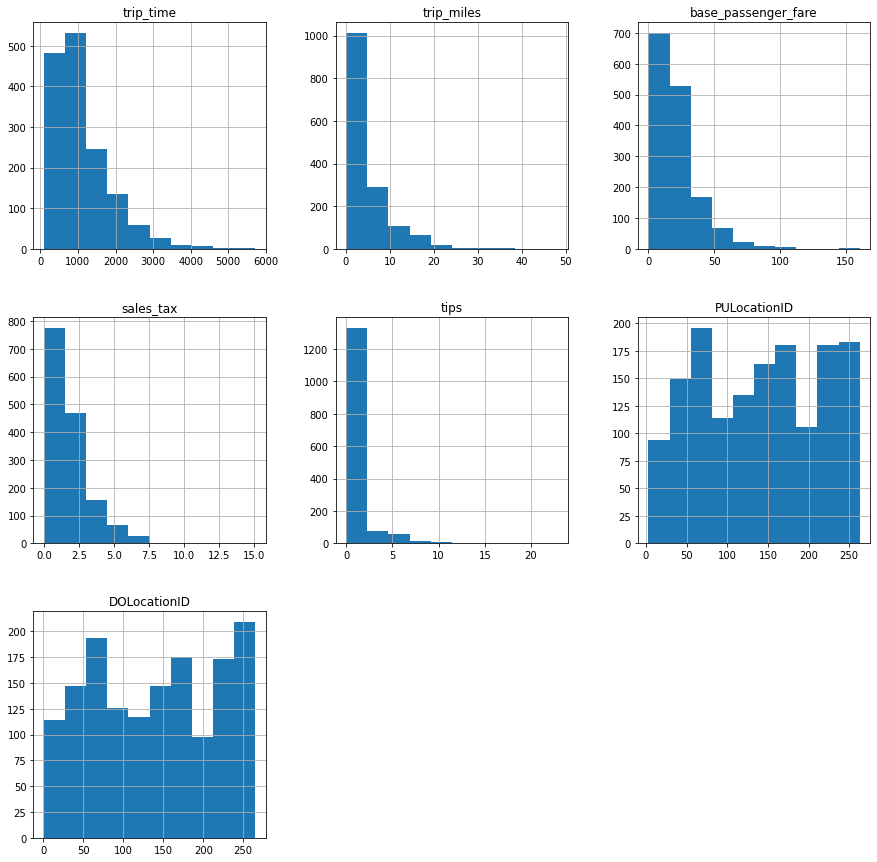

In [53]:
# histogram: check distribution
eda_data.hist(figsize=(15, 15))

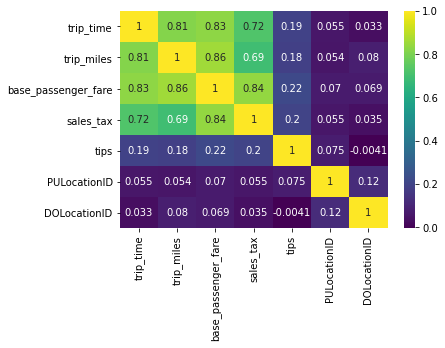

<Figure size 1440x1440 with 0 Axes>

In [57]:
# check correlation
sns.heatmap(eda_data.corr(), annot=True, cmap='viridis')
plt.figure(figsize = (20,20))
plt.show()